Importing necessary libraries

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Loading the cleaned datset

In [169]:
df = pd.read_csv("/content/cleaned_data.csv")

Visual Overview

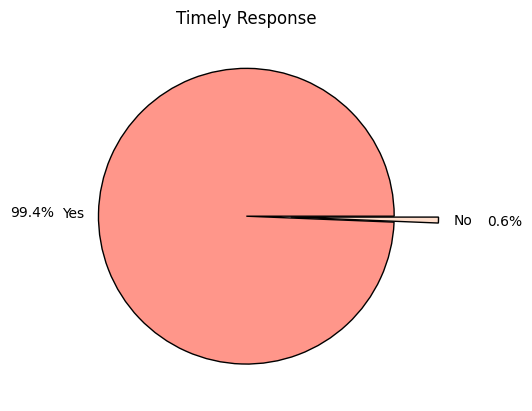

In [101]:
t_count = df['timely_response'].value_counts()

colors = ['#ff968a','#feddcb']
labels = ['Yes','No']
explode=[0,0.3]
plt.figure()

plt.pie(t_count, labels=labels, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},pctdistance=1.45,colors=colors,explode=explode)
plt.title('Timely Response')

plt.show()

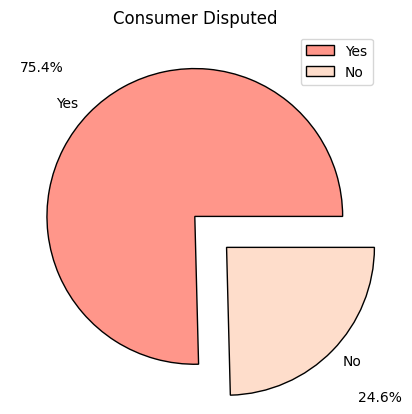

In [106]:
t_count = df['consumer_disputed'].value_counts()

plt.figure()
colors = ['#ff968a','#feddcb']
labels = ['Yes','No']
explode=[0,0.3]

plt.pie(t_count,labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},pctdistance=1.45)
plt.title('Consumer Disputed')
plt.legend()
plt.show()

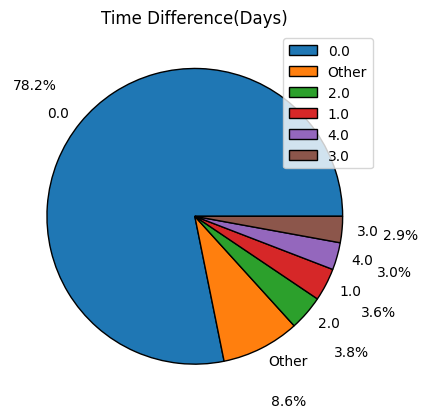

In [108]:
t_count = df['time_difference'].value_counts()

plt.figure()

top_5 = df['time_difference'].value_counts().head(5).index.tolist()
df['time_difference1'] = df['time_difference'].apply(lambda x: x if x in top_5 else 'Other')

category_counts = df['time_difference1'].value_counts()

plt.pie(category_counts,labels=category_counts.index, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},pctdistance=1.4)
plt.title('Time Difference(Days)')
plt.legend()

plt.show()

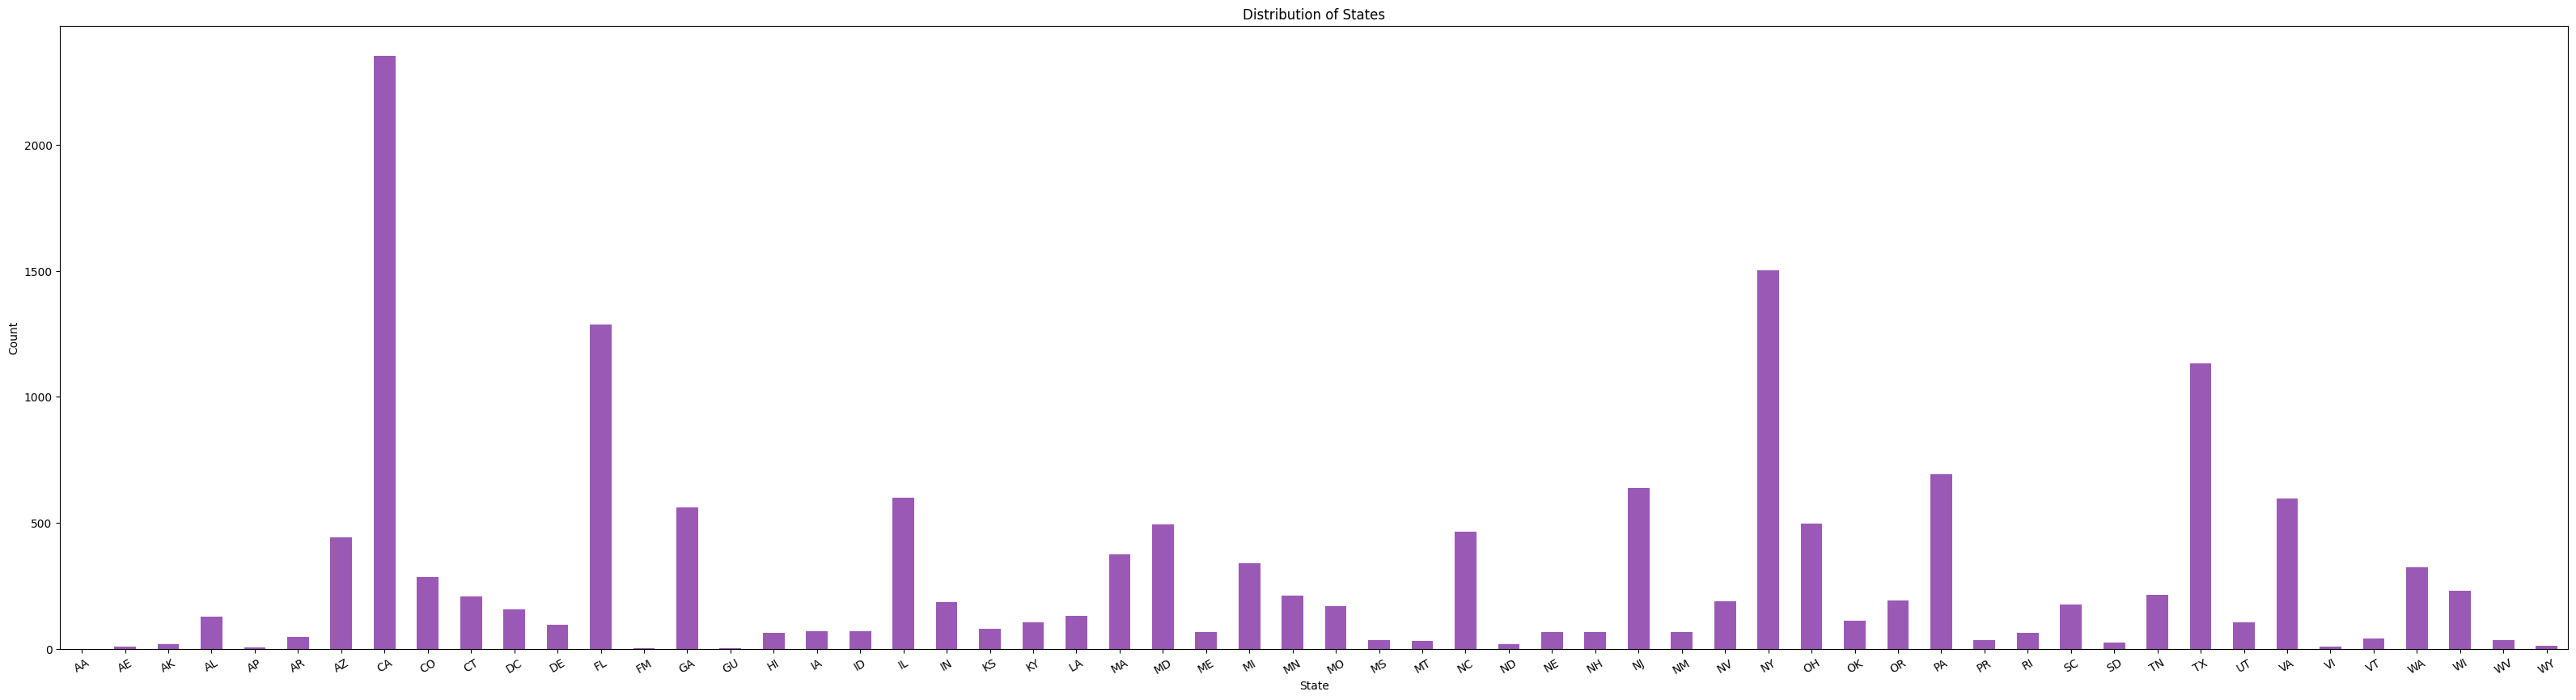

In [142]:
s_cols = [col for col in df.columns if col.startswith('state_')]
s_counts = df[s_cols].sum()

s_names = [col.replace('state_', '') for col in s_cols]

plt.figure(figsize=(40, 10))
s_counts.plot(kind='bar')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(range(len(s_names)), s_names, rotation=30)
plt.show()

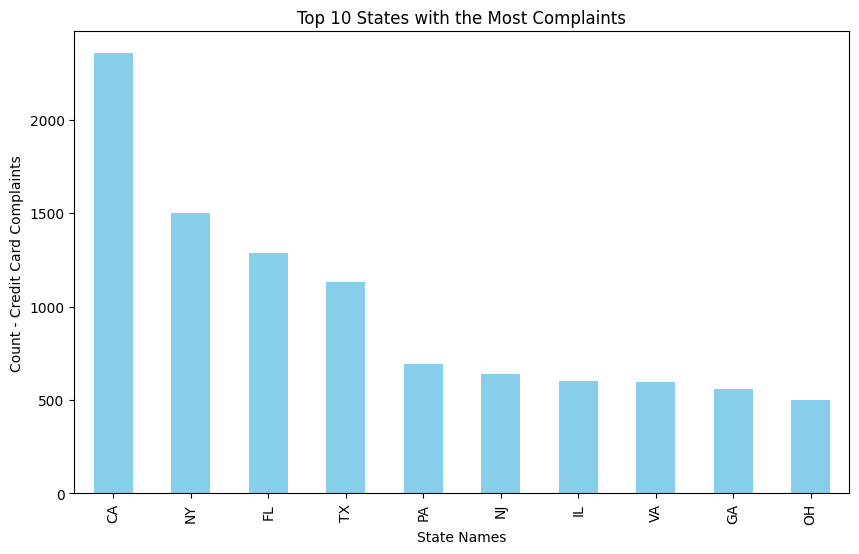

In [153]:
s_cols = [col for col in df.columns if col.startswith('state_')]
s_counts = df[s_cols].sum()

top_10_states = s_counts.nlargest(10)
s_names = [col.replace('state_', '') for col in top_10_states.index]

plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')

plt.title('Top 10 States with the Most Complaints')
plt.xlabel('State Names')
plt.ylabel('Count - Credit Card Complaints')

plt.xticks(range(len(s_names)), s_names)
plt.show()

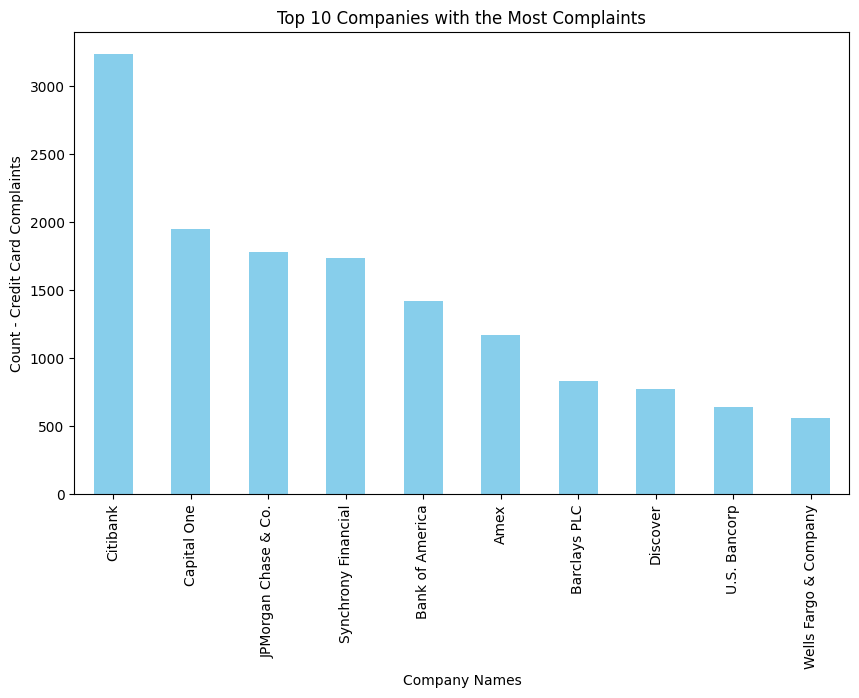

In [150]:
comp_cols = [col for col in df.columns if col.startswith('company_') and not col.startswith('company_response_to_consumer_')]
comp_counts = df[comp_cols].sum()

top_10_companies = comp_counts.nlargest(10)
comp_names = [col.replace('company_', '') for col in top_10_companies.index]

plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', color='skyblue')

plt.title('Top 10 Companies with the Most Complaints')
plt.xlabel('Company Names')
plt.ylabel('Count - Credit Card Complaints')
plt.xticks(range(len(comp_names)), comp_names, rotation=90)
plt.show()

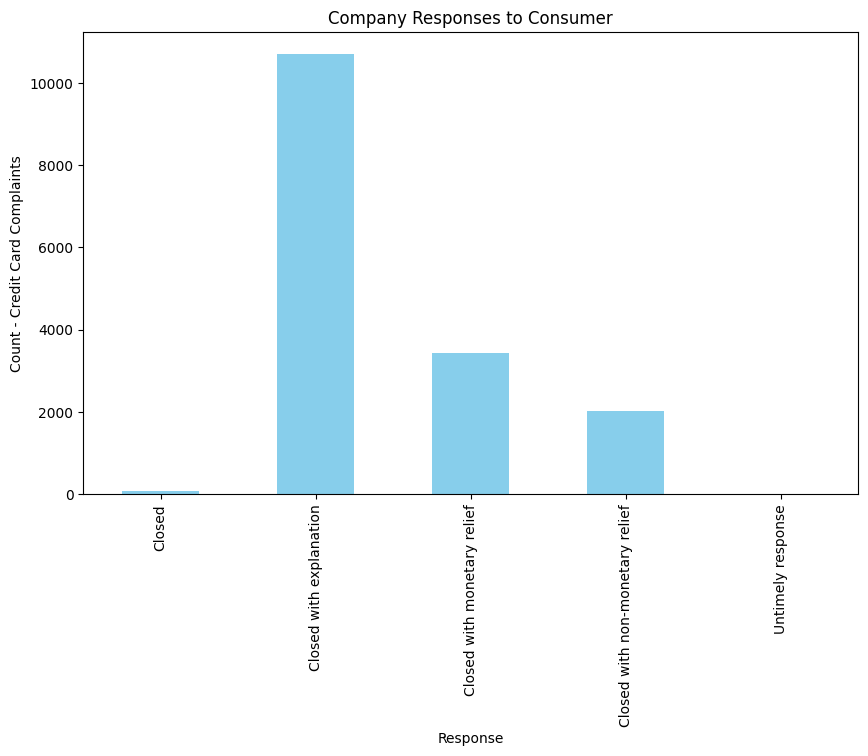

In [154]:
compr_cols = [col for col in df.columns if col.startswith('company_response_to_consumer_')]
compr_counts = df[compr_cols].sum()

compr_names = [col.replace('company_response_to_consumer_', '') for col in compr_cols]

plt.figure(figsize=(10, 6))
compr_counts.plot(kind='bar', color='skyblue')

plt.title('Company Responses to Consumer')
plt.xlabel('Response')
plt.ylabel('Count - Credit Card Complaints')
plt.xticks(range(len(compr_names)), compr_names, rotation=90)
plt.show()


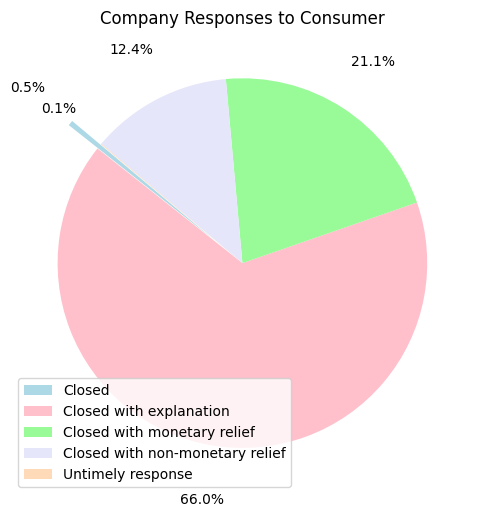

In [167]:
plt.figure(figsize=(10, 6))
colors = ['#add8e6', '#ffc0cb', '#98fb98', '#e6e6fa', '#ffdab9']
explode = (0.2, 0, 0, 0, 0)

plt.pie(compr_counts, labels=[''] * len(compr_names), autopct='%1.1f%%', startangle=140 ,pctdistance=1.3,colors=colors,explode=explode)
plt.title('Company Responses to Consumer')

plt.legend(compr_names)
plt.show()

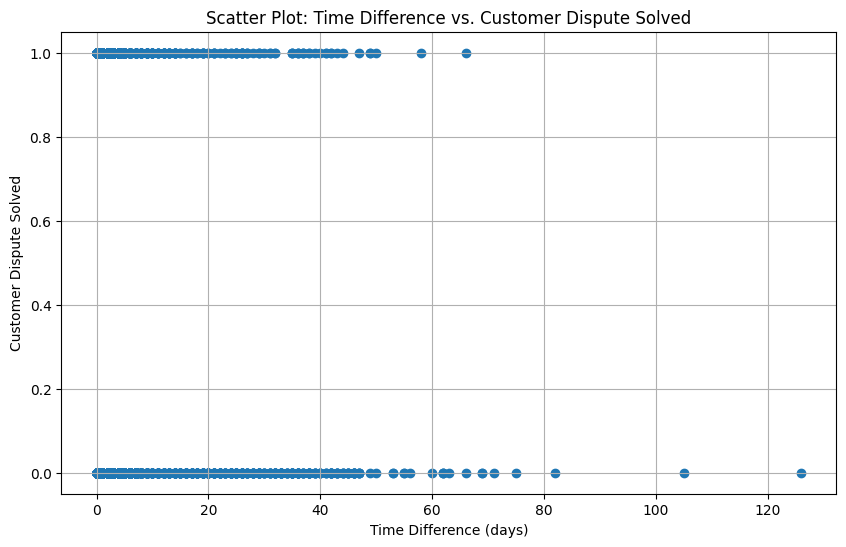

In [109]:
plt.figure(figsize=(10, 6))

plt.scatter(df['time_difference'], df['consumer_disputed'])

plt.xlabel('Time Difference (days)')
plt.ylabel('Customer Dispute Solved')
plt.title('Scatter Plot: Time Difference vs. Customer Dispute Solved')

plt.grid(True)
plt.show()

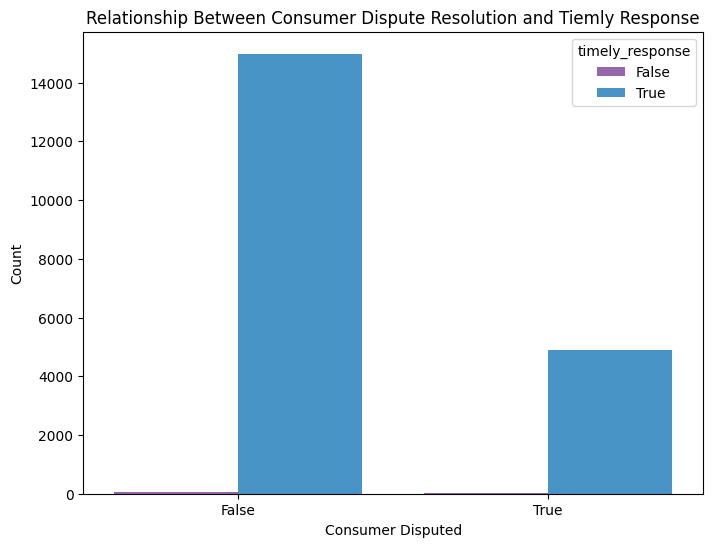

In [113]:
plt.figure(figsize=(8, 6))

color= ["#9b59b6", "#3498db"]
sns.set_palette(color)

sns.countplot(data=df, x="consumer_disputed", hue="timely_response")
plt.xlabel("Consumer Disputed")
plt.ylabel("Count")
plt.title("Relationship Between Consumer Dispute Resolution and Timely Response")
plt.show()

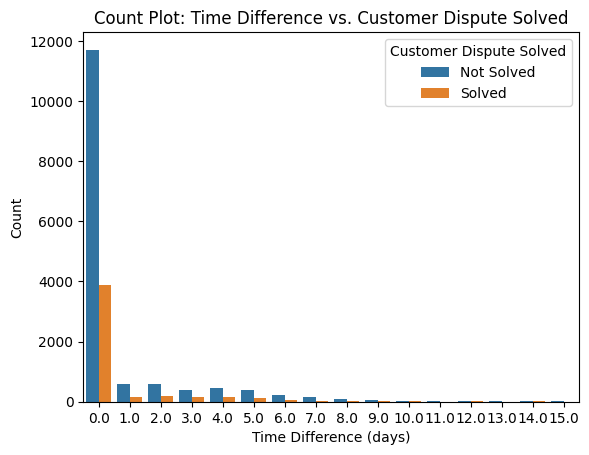

<Figure size 1000x600 with 0 Axes>

In [111]:
time_limit = 15
filter = df[df['time_difference'] <= time_limit]

sns.countplot(x='time_difference', hue='consumer_disputed', data=filter)

plt.xlabel('Time Difference (days)')
plt.ylabel('Count')
plt.title('Count Plot: Time Difference vs. Customer Dispute Solved')
plt.legend(title='Customer Dispute Solved', labels=['Not Solved', 'Solved'])

plt.figure(figsize=(10, 6))
plt.show()

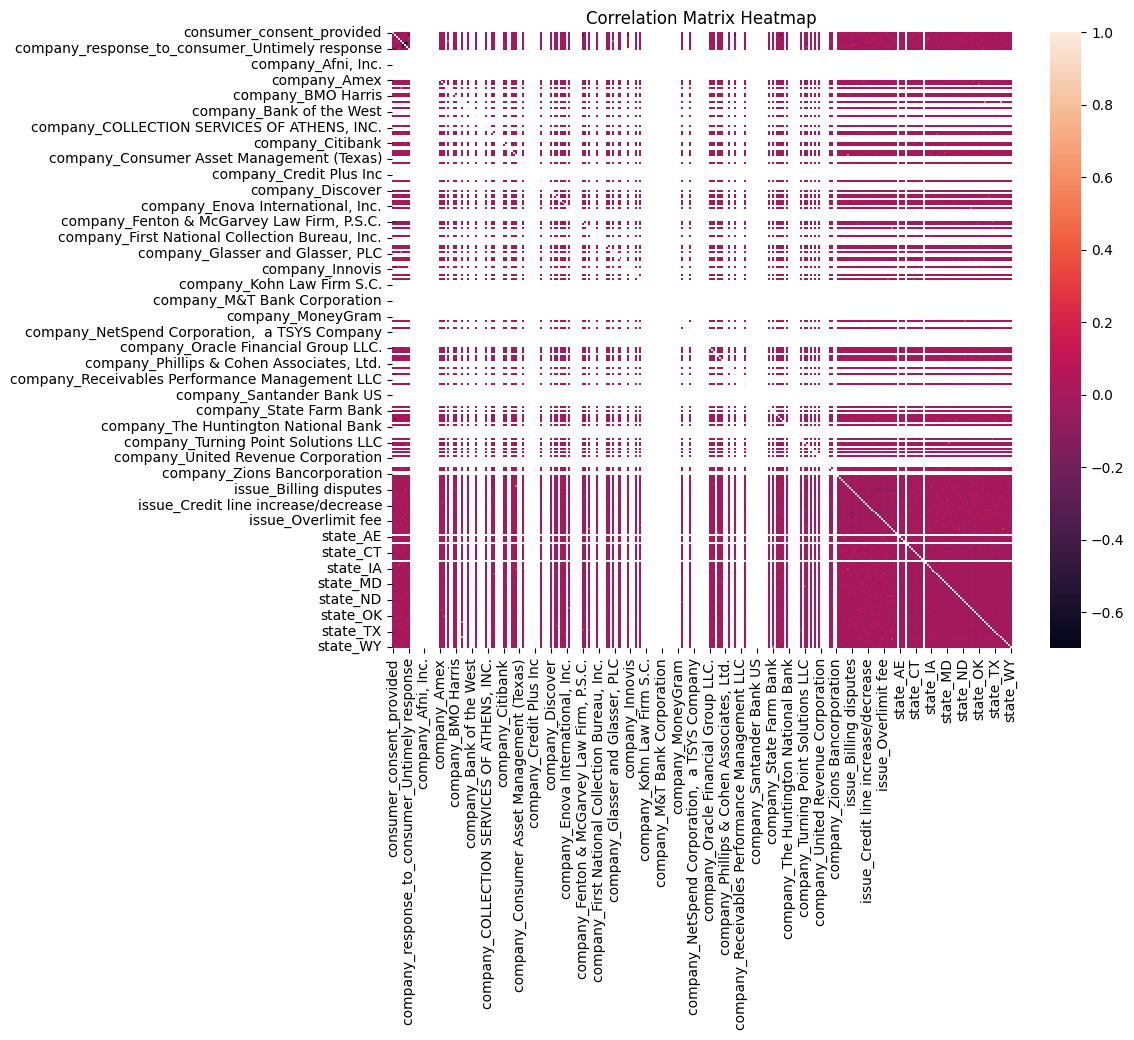

In [119]:
sample_df = df.sample(frac=0.1)
correlation_matrix = sample_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix Heatmap")

plt.show()

In [131]:
df.describe()

,consumer_consent_provided,timely_response,consumer_disputed,time_difference,company_response_to_consumer_Closed,company_response_to_consumer_Closed with explanation,company_response_to_consumer_Closed with monetary relief,company_response_to_consumer_Closed with non-monetary relief,company_response_to_consumer_Untimely response,submitted_via_Web,...,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY
count,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.0,...,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000,16230.000000
mean,0.597535,0.994640,0.290511,1.317190,0.004621,0.659704,0.211091,0.123968,0.000616,1.0,...,0.013309,0.069871,0.006470,0.036845,0.000555,0.002588,0.020025,0.014171,0.002095,0.000863
std,0.490410,0.073021,0.503683,4.963972,0.067823,0.473823,0.408095,0.329555,0.024815,0.0,...,0.114597,0.254937,0.080175,0.188388,0.023543,0.050806,0.140089,0.118200,0.045723,0.029358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,257.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
df.columns

Index(['consumer_consent_provided', 'timely_response', 'consumer_disputed',
       'time_difference', 'company_response_to_consumer_Closed',
       'company_response_to_consumer_Closed with explanation',
       'company_response_to_consumer_Closed with monetary relief',
       'company_response_to_consumer_Closed with non-monetary relief',
       'company_response_to_consumer_Untimely response', 'submitted_via_Web',
       ...
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VI', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=313)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Using the Random Forest Classifier Model

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [171]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [172]:
print(f"Accuracy: {accuracy*100}%\n")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 70.08626001232285%

Confusion Matrix:
[[2115  278   12]
 [ 603  155    3]
 [  68    7    5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      2405
           1       0.35      0.20      0.26       761
           2       0.25      0.06      0.10        80

    accuracy                           0.70      3246
   macro avg       0.45      0.38      0.39      3246
weighted avg       0.65      0.70      0.67      3246



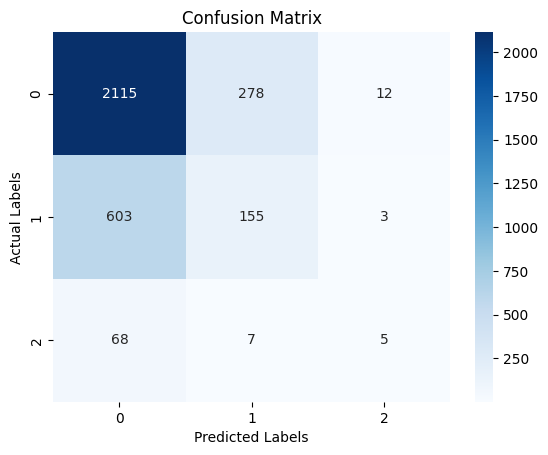

In [173]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()